In [14]:
obst = [(9,7), (8,7), (7,7), (7,8)]
class PathFinder():
    def __init__(self, gridsize=(10,10), start_point=(0,0), end_point=(9,9),
                    obstacles=obst):
        """Initializes attributes describing the situation"""
        from numpy import ones, array, inf
        self.gridsize = gridsize
        self.start_point = start_point
        self.end_point = end_point
        self.obstacles = obstacles
        
        ### Creating env attribute describing obstacles ###
        # Initialize array
        arrsize = (gridsize[1] + 2, gridsize[0] + 2)
        environment = ones(arrsize, dtype=bool)
        # Create borders of grid
        environment[0,:] = False
        environment[arrsize[0] - 1,:] = False
        environment[:,0] = False
        environment[:,arrsize[1] - 1] = False
        # Translate coordinates of obstacles to 12x12 coordinates
        obstacles = array(obstacles) + 1
        # Mark obstacles on grid
        for coord in obstacles:
            environment[coord[1],coord[0]] = False
        self.env = environment
        
        ### Creating path distances attribute ###
        path_distances = inf*ones(arrsize)
        path_distances[start_point[1]+1, start_point[0]+1] = 0
        self.path_dist = path_distances
        
        ### Creating previous node attribute ###
        self.prev = {(start_point[1]+1, start_point[0]+1): 'end'}
        
        ### Min path attribute ###
        self.min_path = 'tbc'
    
    def neighbours(self, node_coords):
        """Returns a list of the neighbours of the node in the form of an array"""
        from numpy import array, empty, append
        possible_neighbours = array([[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]])
        possible_neighbours[:,0] += node_coords[0]
        possible_neighbours[:,1] += node_coords[1]
        # Initialize neighbours array
        neighbours = empty((0,2), dtype=int)
        # Add eligible neighbours
        for pn in possible_neighbours:
            if self.env[tuple(pn)]:
                neighbours = append(neighbours, [pn], axis=0)
        return neighbours
                
    def dijkstras_step(self, boolarr):
        """Performs a step of Dijkstra's algorithm"""
        from numpy import amin, where
        from math import sqrt
        mins = where(self.path_dist == amin(self.path_dist[boolarr]))
        for i in range(len(mins[0])):
            coord = (mins[0][i], mins[1][i])
            if boolarr[coord]:
                break
        dist = self.path_dist[coord]
        boolarr[coord] = False
        neighbours = self.neighbours(coord)
        for neighbour in neighbours:
            n = tuple(neighbour)
            if neighbour[0] == coord[0] or neighbour[1] == coord[1]:
                ndist = 1
            else:
                ndist = sqrt(2)
            if self.path_dist[n] > dist + ndist:
                self.path_dist[n] = dist + ndist
                self.prev[n] = coord
   
    def find_min_path(self):
            """Finds the minimum path"""
            from copy import copy
            barr = copy(self.env)
            # Implement Dijkstra's algorith
            while True in barr:
                self.dijkstras_step(barr)
            # Initialize path list
            path_list = [(self.end_point[1]+1, self.end_point[0]+1)]
            # Print message is there is no path
            if path_list[0] not in self.prev:
                self.min_path = (None, False)
                return "Unable to reach delivery point"
            # Create a list of points on the path
            while self.prev[path_list[0]] != 'end':
                path_list.insert(0, self.prev[path_list[0]])
            # Convert to required coordinate system
            path_list = [(c[1]-1,c[0]-1) for c in path_list]
            self.min_path = (path_list, True)
            # Return the path taken and the number of steps in the path
            return path_list, len(path_list) - 1


    def plot_path(self):
        """Plots the path taken"""
        from matplotlib.pyplot import imshow, plot
        from numpy import delete
        from copy import copy
        boolarr = copy(self.env)
        boolarr = delete(boolarr, 0, 0)
        boolarr = delete(boolarr, 10, 0)
        boolarr = delete(boolarr, 0, 1)
        boolarr = delete(boolarr, 10, 1)
        if self.min_path == 'tbc':
            self.find_min_path()
        if self.min_path[1]:
            imshow(boolarr)
            path = self.min_path[0]
            x = [c[0] for c in path]
            y = [c[1] for c in path]
            plot(x,y, color='red')
        else:
            imshow(boolarr)
        plot(self.start_point[0], self.start_point[1], marker='o', markersize=15, color='red')
        plot(self.end_point[0], self.end_point[1], marker='*', markersize=20, color='red')

([(0, 0), (0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 9), (9, 9)], 11)


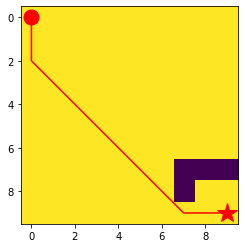

In [15]:
### Phase 1 ###
phase1 = PathFinder()
print(phase1.find_min_path())
phase1.plot_path()

([(0, 0), (1, 0), (2, 1), (2, 2), (3, 3), (4, 4), (4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 9), (9, 9)], 12)


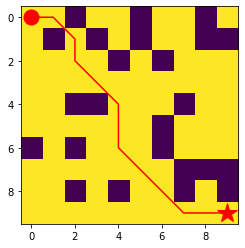

In [17]:
### Phase 2 ###
from random import randint, sample
from numpy import delete
# Generate the 20 random obstacles
excluded = obst +  [(0,0), (9,9)]
population = [(i, j) for i in range(10) for j in range(10)]
for c in excluded:
    population.remove(c)
additional_obstacles = sample(population, 20)
obst2 = additional_obstacles + obst

phase2 = PathFinder(obstacles=obst2)
print(phase2.find_min_path())
phase2.plot_path()

Unable to reach delivery point


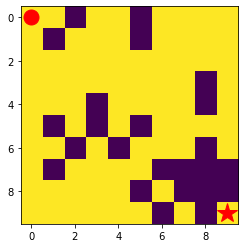

In [21]:
### Bonus print error message ###
from random import randint, sample
from numpy import delete
# Generate the 20 random obstacles
excluded = obst +  [(0,0), (9,9)]
population = [(i, j) for i in range(10) for j in range(10)]
for c in excluded:
    population.remove(c)
additional_obstacles = sample(population, 20)
obst2 = additional_obstacles + obst

phase2 = PathFinder(obstacles=obst2)
print(phase2.find_min_path())
phase2.plot_path()